# Homework 11:  Tree-based methods
This is the last homework assignment! It is designed to give you practice with tree-based methods - specifically, decision trees and random forests.

​
You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

​
This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measurements from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (0 points)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. Remove all variables except column 38 (`Flanker_Unadj`), and columns 110 to 124 (the first 15 variables that start with `FS_`). Remove all _na_ values.

In [3]:
# WRITE YOUR CODE HERE
library(tidyverse)
data <- read.csv('unrestricted_trimmed_1_7_2020_10_50_44.csv')
data <- data[c(38,110:124)] %>% drop_na
head(data)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘tibble’ was built under R version 3.6.2”
Warning message:
“package ‘tidyr’ was built under R version 3.6.2”
Warning message:
“package ‘readr’ was built under R version 3.6.2”
Warning message:
“package ‘purrr’ was built under R version 3.6.2”
Warning message:
“package ‘dplyr’ was built under R version 3.6.2”
Warning message:
“package ‘forcats’ was built under R version 3.6.2”
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()  masks random

,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_BrainSeg_Vol_No_Vent,FS_BrainSeg_Vol_No_Vent_Surf,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,FS_R_WM_Vol,FS_Tot_WM_Vol,FS_Mask_Vol,FS_BrainSegVol_eTIV_Ratio
,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,130.42,1864518,1406924,1389007,1386836,304488,305634,610122,70240,807245,1239692,269963,273170,543134,2118186,0.754578
2,112.56,1512540,1109710,1098854,1097122,240030,243207,483238,56623,664124,957615,203472,203819,407292,1549276,0.733673
3,121.18,1684117,1280171,1260943,1259250,260695,265243,525938,63869,726206,1106881,247504,252913,500417,1844923,0.760144
4,126.53,1816044,1321362,1306929,1304569,276506,278002,554508,74869,762308,1155067,254742,258203,512946,1827401,0.727605
5,101.85,1437868,1053766,1038408,1037793,203718,210539,414257,58813,579632,916973,213012,216438,429449,1478182,0.732867
6,107.04,1512727,1126655,1111763,1109747,242489,248807,491296,62092,665024,984952,205342,211653,416995,1615636,0.744784


---
## 2. Fitting a single tree (3 points)

We want to fit a decision tree to predict flanker task performance using the neural data you have loaded.

(a) Load the `tree` library. Identify a random half of the observations to be set aside as test data. Then fit a tree on the training data that predicts `Flanker_Unadj` using all the other variables. 

In [5]:
# WRITE YOUR CODE HERE
# install.packages('tree')
library(tree)
indices = sample.int(nrow(data),size=nrow(data)/2)
tree.flanker = tree(Flanker_Unadj~.,data, subset=indices)

Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 



(b) Use `summary()` and `plot()` to get a sense of the fitted tree.


Regression tree:
tree(formula = Flanker_Unadj ~ ., data = data, subset = indices)
Variables actually used in tree construction:
[1] "FS_IntraCranial_Vol"       "FS_LCort_GM_Vol"          
[3] "FS_Mask_Vol"               "FS_BrainSegVol_eTIV_Ratio"
[5] "FS_Total_GM_Vol"           "FS_TotCort_GM_Vol"        
[7] "FS_SubCort_GM_Vol"         "FS_RCort_GM_Vol"          
Number of terminal nodes:  16 
Residual mean deviance:  79.4 = 42880 / 540 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-22.1900  -5.6280  -0.1064   0.0000   6.0080  29.7000 

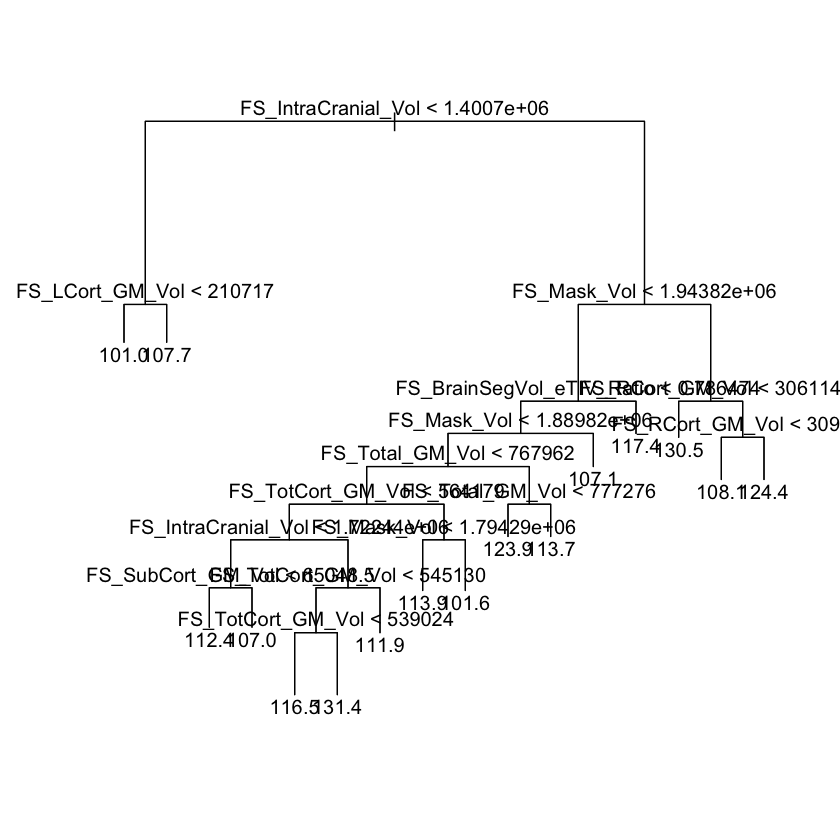

In [11]:
# WRITE YOUR CODE HERE
summary(tree.flanker)
plot(tree.flanker)
text(tree.flanker)

(c) For the training and test sets separately, do the following: (i) use the model to generate predictions, (ii) plot the tree predictions against the actual values of `Flanker_Unadj`, and (iii) calculate the mean-squared error.




[1] 77.11351

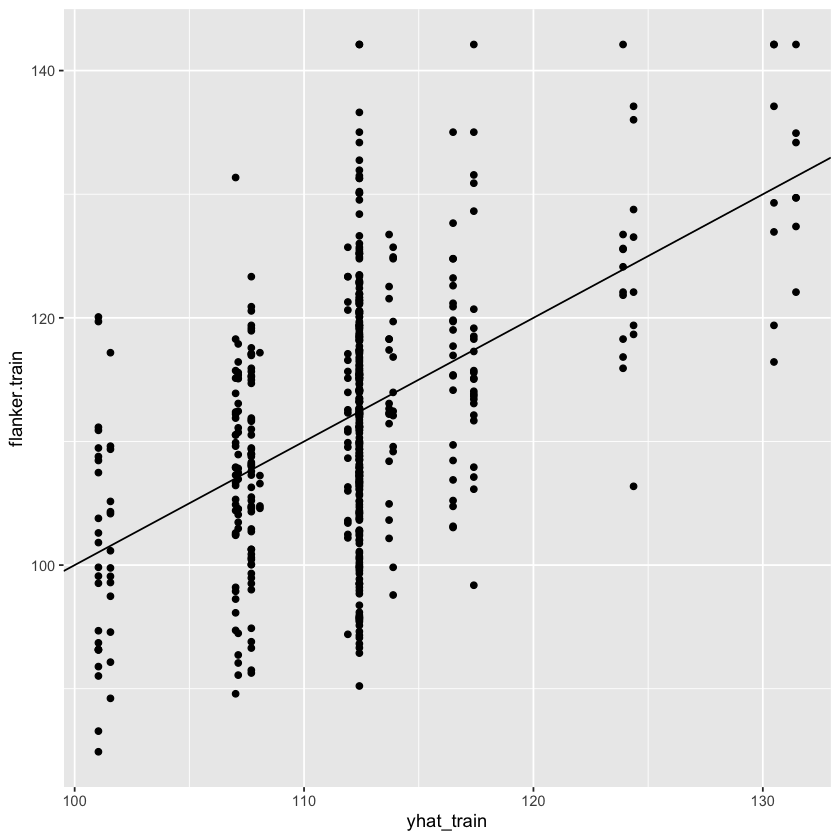

[1] 121.0148

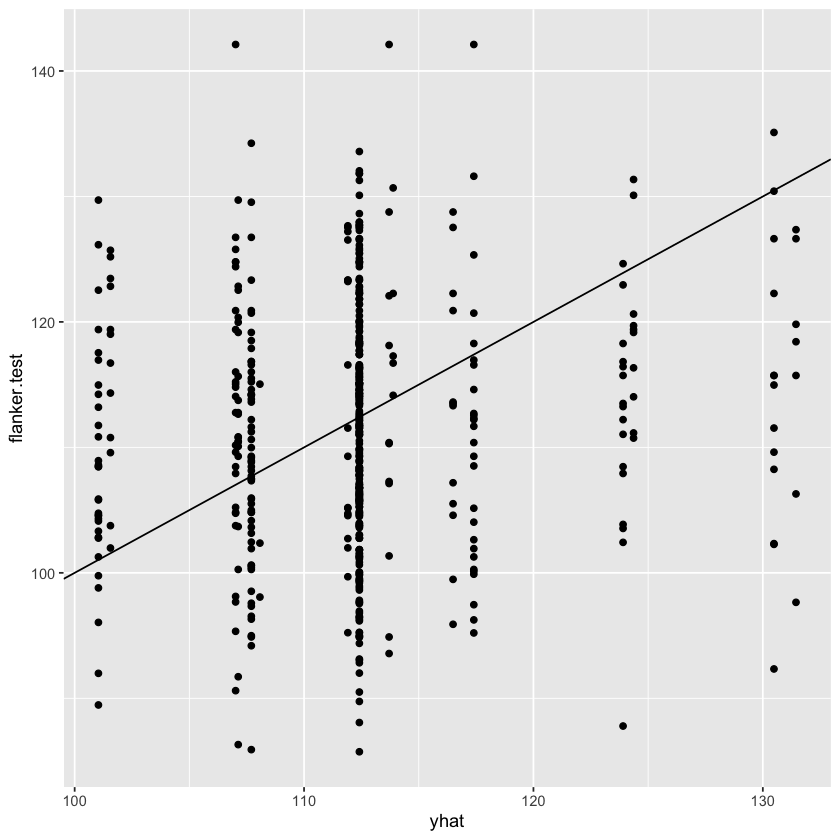

In [9]:
# WRITE YOUR CODE HERE
# train data
yhat_train=predict(tree.flanker,newdata=data[indices ,])
flanker.train=data[indices, "Flanker_Unadj"]
require(ggplot2)
ggplot(data.frame(yhat=yhat_train,flanker.train=flanker.train),aes(x=yhat_train,y=flanker.train)) + 
    geom_point() + 
    geom_abline(slope=1,intercept=0)
mean((yhat_train-flanker.train)^2)

# test data 
yhat=predict(tree.flanker,newdata=data[-indices ,])
flanker.test=data[-indices, "Flanker_Unadj"]
require(ggplot2)
ggplot(data.frame(yhat=yhat,flanker.test=flanker.test),aes(x=yhat,y=flanker.test)) + 
    geom_point() + 
    geom_abline(slope=1,intercept=0)
mean((yhat-flanker.test)^2)

(d) What might you try next to improve the tree's testing error, and why might it help? 
> We can try using different subset of variables and using a collection of many trees trained on separate subsets of data to get more generalizability. Random forests provide both these functionalities. Decision trees by depending only on a particular subset of features make the model very rigid. Randomness in terms of feature and data section makes the overall model very flexible and less likely to overfit on training data.
I also suspect that since random forest is taking an average over several models' predictions, the output will be a continuous value and not be defined into discrete categories like above. This can also reduce loss.  

## 3. Random Forests (3 points)

(a) Now let's try out the random forests method. Load the `randomForest` library and use `randomForest()` to fit a model that uses 50 trees.

In [6]:
# WRITE YOUR CODE HERE
# install.packages('randomForest')
library(randomForest)
flanker.random=randomForest(Flanker_Unadj~.,data=data, subset=indices,
                       importance=TRUE, ntree=50,mtry=2)

(b) Like in part (c) of section 2, use the model to generate predictions for both the train and test data. Plot the predicted `Flanker_Unadj` values relative to the original ones for each data set, and calculate the test and train MSEs. 

[1] 20.99391

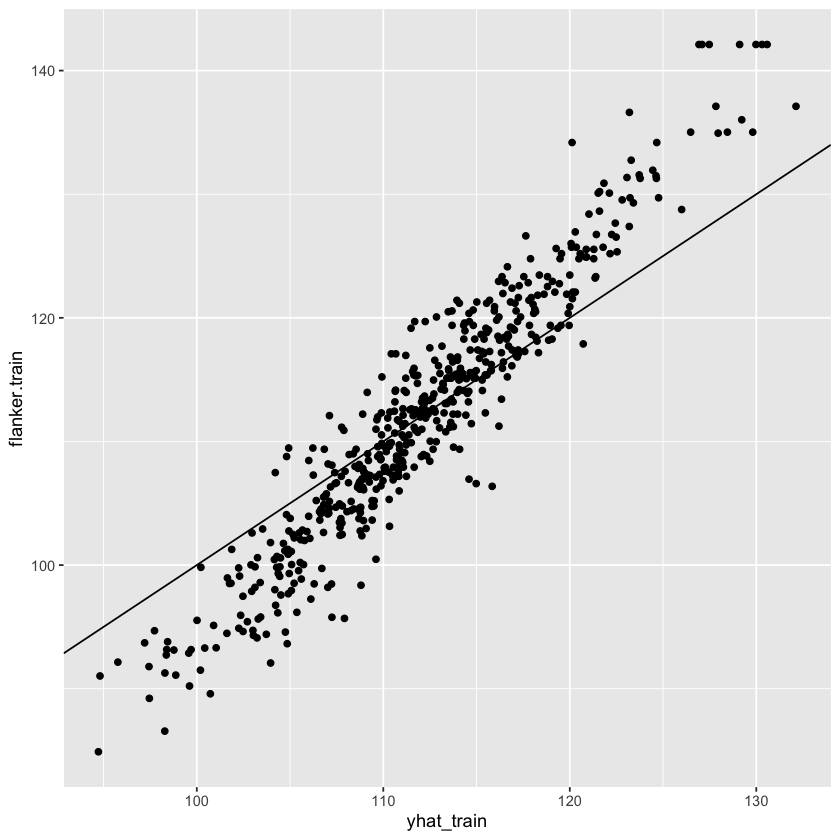

[1] 108.9926

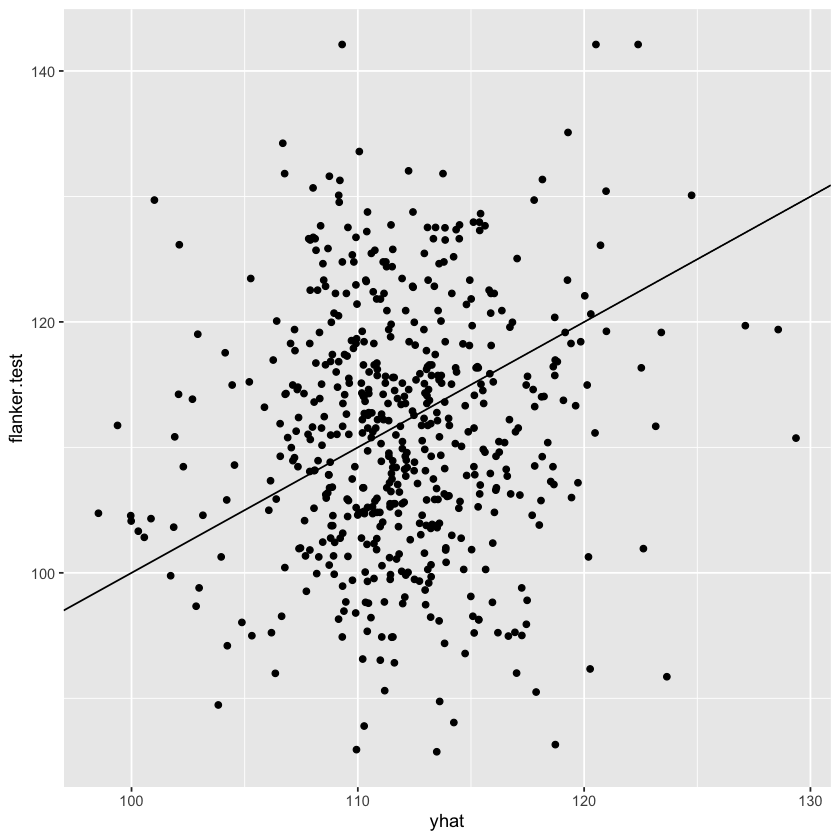

In [36]:
# WRITE YOUR CODE HERE
# train data
yhat_train=predict(flanker.random,newdata=data[indices ,])
flanker.train=data[indices, "Flanker_Unadj"]
require(ggplot2)
ggplot(data.frame(yhat=yhat_train,flanker.train=flanker.train),aes(x=yhat_train,y=flanker.train)) + 
    geom_point() + 
    geom_abline(slope=1,intercept=0)
mean((yhat_train-flanker.train)^2)

# test data 
yhat=predict(flanker.random,newdata=data[-indices ,])
flanker.test=data[-indices, "Flanker_Unadj"]
require(ggplot2)
ggplot(data.frame(yhat=yhat,flanker.test=flanker.test),aes(x=yhat,y=flanker.test)) + 
    geom_point() + 
    geom_abline(slope=1,intercept=0)
mean((yhat-flanker.test)^2)

How do the train and test error compare with those from the single decision tree? 
> The training error has reduced drastically possibly indicating overfitting. The testing error has reduced too but not by much. I tried using different values of mtry but a smaller value gives the best result. These plots are also easier to interpret than decision tree since the outputs are not binned.

(c) Look at the importance of each variable. 

,%IncMSE,IncNodePurity
FS_IntraCranial_Vol,5.7707094,4419.512
FS_BrainSeg_Vol,3.9614194,3688.022
FS_BrainSeg_Vol_No_Vent,5.3280297,3406.186
FS_BrainSeg_Vol_No_Vent_Surf,4.7736989,3439.082
FS_LCort_GM_Vol,4.9810747,3741.022
FS_RCort_GM_Vol,3.8071708,3458.959
FS_TotCort_GM_Vol,4.0315470,3918.912
FS_SubCort_GM_Vol,2.9045856,3397.613
FS_Total_GM_Vol,4.6241054,3815.238
FS_SupraTentorial_Vol,4.7929035,3283.872


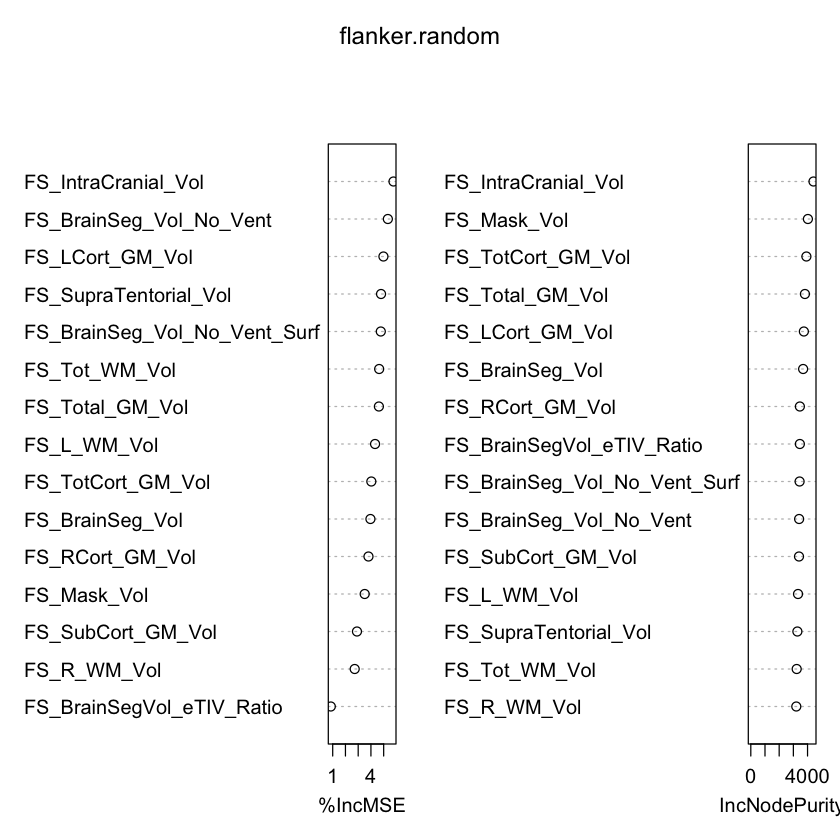

In [26]:
# WRITE YOUR CODE HERE
importance(flanker.random)
varImpPlot(flanker.random)

Which variables are the strongest contributors to explaining variance in the Flanker task?

> Intercranial Volume gives high purity and high %incMSE. It is also on the top for the variance importance plot. Cannot conclude about other variables since they change a lot across the different metrics and also change drastically as mtry value changes. 

## 4. Bias-Variance Tradeoff in Random Forest Models (4 points)

(a) Using a `for` loop (or one of the `apply` functions if you prefer), fit random forest models with number of trees ranging from 1 to 50. Save the out-of-bag (OOB) error *and* hold-out test error for each number of trees. Set the number of variables to subsamble on each tree (`mtry`) to 4. *Hint: You can access the OOB mean squared error for `m` trees using `rfmodel$mse[m]`, where `rfmodel` is replaced with your model name.*

In [13]:
ntrees=50
maxm = 4
oob.err<-double(ntrees) # initialize empty vector for OOB mse 
test.err<-double(ntrees) # initialize empty vector for hold-out test mse
for (i in 1:ntrees){
    model <- randomForest(Flanker_Unadj~.,data=data, subset=indices,
                       importance=TRUE, ntree=i,mtry=maxm)
    oob.err[i] <- model$mse[i]
    yhat=predict(model,newdata=data[-indices ,])
    flanker.test=data[-indices, "Flanker_Unadj"]
    test.err[i]<-mean((yhat-flanker.test)^2)
}

(b) Plot the two errors as a function of number of trees.

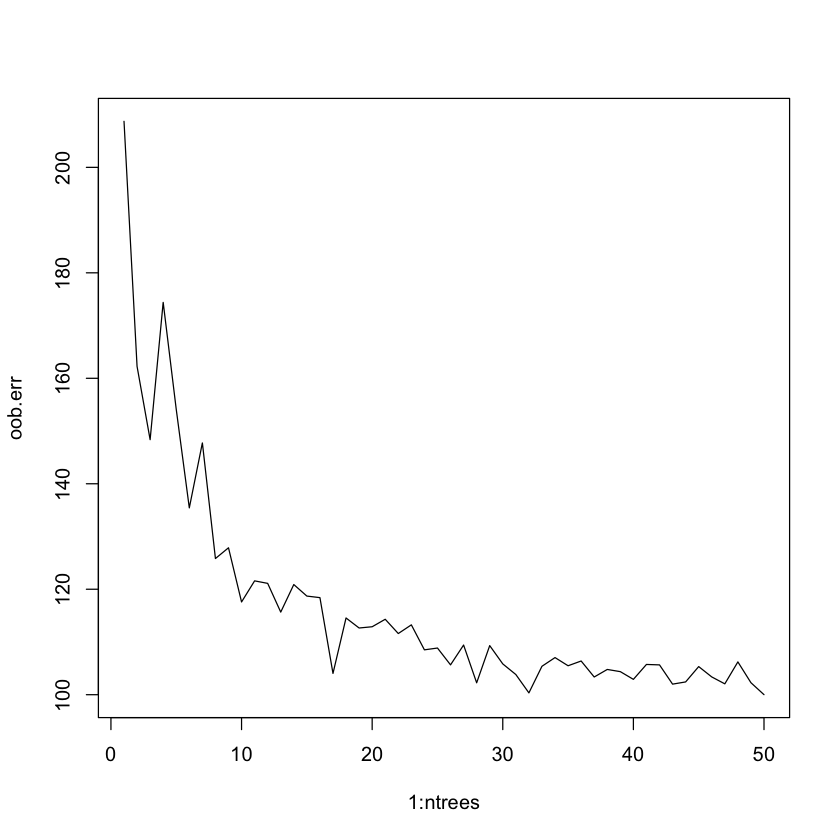

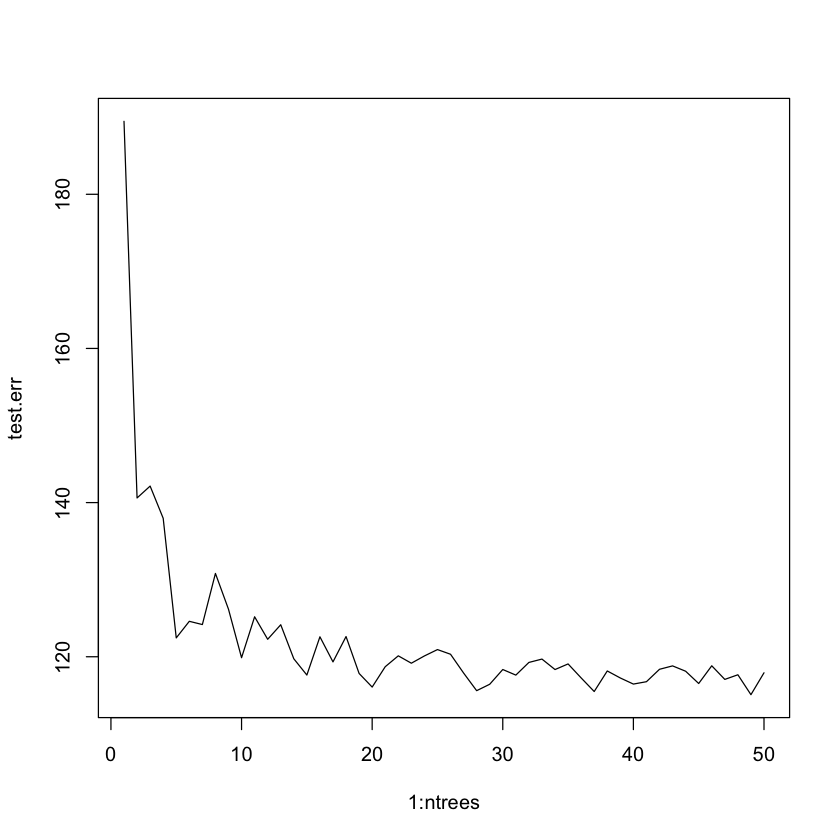

In [14]:
# WRITE YOUR CODE HERE
plot(1:ntrees,oob.err,type='l')
plot(1:ntrees,test.err,type='l')

How does test error change as you increase number of trees?

> Test error decreases as the number of trees is increased.   

(c) Repeat the same analysis as in (a), looking at OOB error and test error, but now vary the node size (`nodesize`) which relates to the depth of each tree. Keep number of trees (`ntree`) at 50 and number of variables at each split (`mtry`) at 4.

In [9]:
# WRITE YOUR CODE HERE
depth=50
maxm = 4
oob.err<-double(depth) # initialize empty vector for OOB mse 
test.err<-double(depth) # initialize empty vector for hold-out test mse
for (i in 1:depth){
    model <- randomForest(Flanker_Unadj~.,data=data, subset=indices,
                       importance=TRUE, ntree=50,mtry=maxm,nodesize=i)
    oob.err[i] <- model$mse[depth]
    yhat=predict(model,newdata=data[-indices ,])
    flanker.test=data[-indices, "Flanker_Unadj"]
    test.err[i]<-mean((yhat-flanker.test)^2)
}

(d) Plot the two errors by node size. 

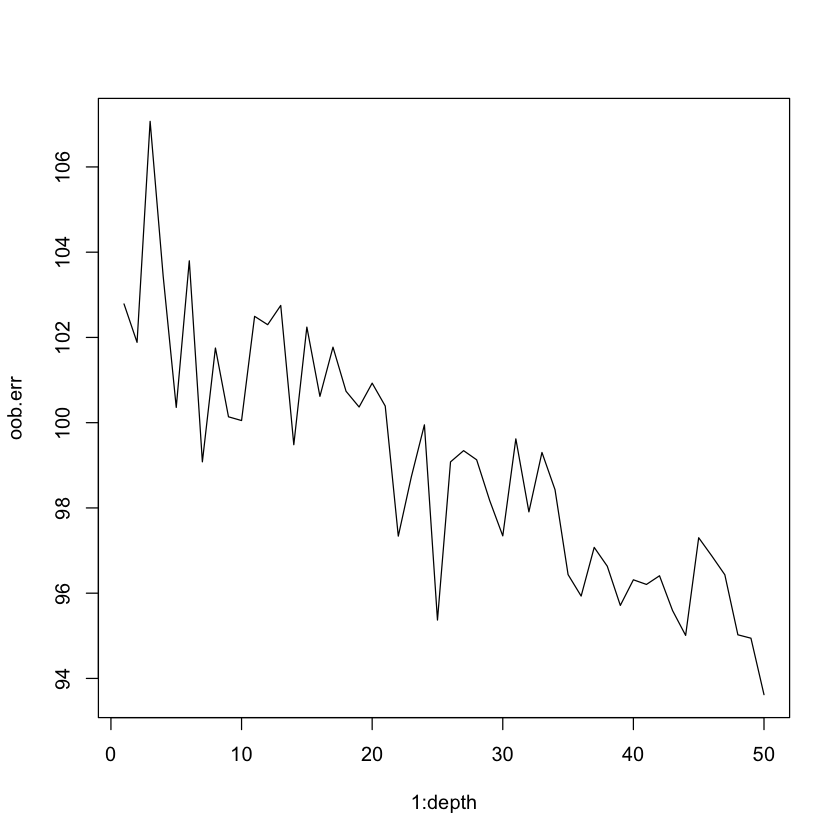

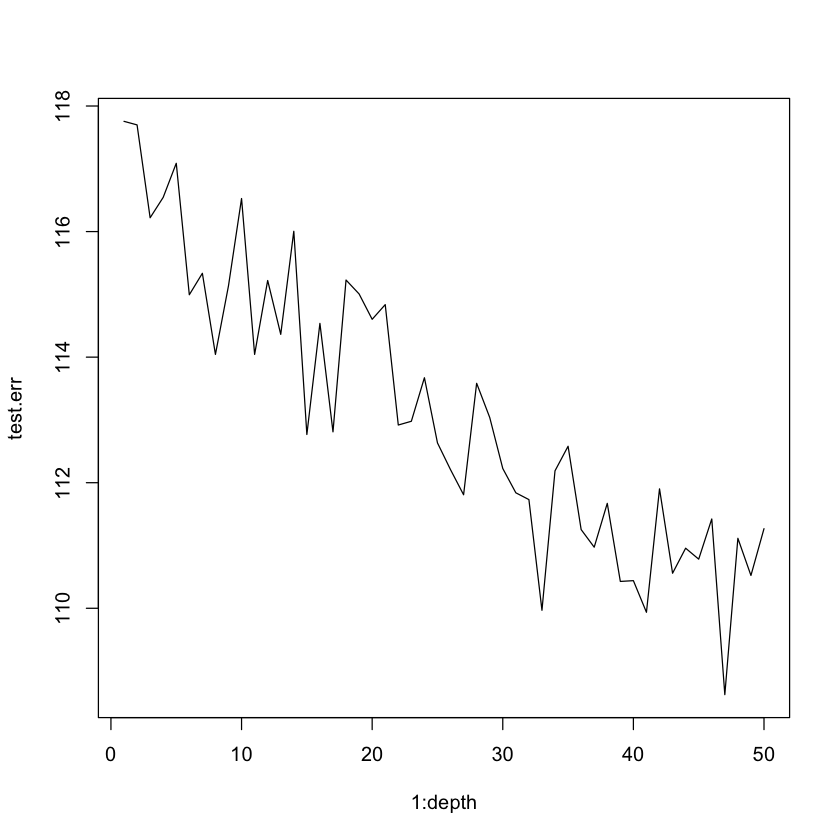

In [11]:
# WRITE YOUR CODE HERE
plot(1:depth,oob.err,type='l')
plot(1:depth,test.err,type='l')

How does test error change as you increase node size?

> The test error decreases as node size is increased. 

## Bonus (1 point) 
Usually when we look at test error for models of increasing complexity, the curve is U-shaped. Test error goes down for a bit and then starts increasing as the model begins overfitting to the training data. Why do we not see this trend as number of trees and node size increase?

> Random forests are able to control overfitting because no one tree gets to see the entire training data. The final output is an average of these trees and so even if a few trees did overfit, that effect will be lost in the average. These trees do not have access to other trees, unlike layers in a neural network, and so a complex hypothesis space is avoided which are prone to overfitting. 

**DUE:** 5pm EST, Sunday May 2, 2021

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Adern Halpern, Fiona Horner